In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [3]:
# Read and display the dataset
df = pd.read_csv("../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
# Check number of reviews
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [5]:
# Display summary
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [6]:
# Print a sample review
print (df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [7]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment']) # 1->positive & 2->negative
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [8]:
# Text preprocessing
def preprocessing(review_imdb):
    review = BeautifulSoup(review_imdb).get_text() # Remove HTML tags
    review = re.sub("[^a-zA-Z]", " ", review) # Remove special characters
    review = review.lower().split() # Convert to lowercase and split each word
    
    stop_w = set(stopwords.words("english")) # Use a set instead of list for faster searching
    review = [w for w in review if not w in stop_w] # Remove stop words
    review = [WordNetLemmatizer().lemmatize(w) for w in review] # Lemmatization
    
    return (" ".join(review)) # Return the words after joining each word separated by space

In [9]:
# Clean all movie reviews
clean_reviews = []

for i in range(0, df['review'].size):
    clean_reviews.append(preprocessing(df['review'][i]))
    if( (i+1)%5000 == 0 ):
        print ("Review %d of 50000 done\n" % ( i+1))

Review 5000 of 50000 done

Review 10000 of 50000 done

Review 15000 of 50000 done

Review 20000 of 50000 done

Review 25000 of 50000 done

Review 30000 of 50000 done

Review 35000 of 50000 done

Review 40000 of 50000 done

Review 45000 of 50000 done

Review 50000 of 50000 done



In [10]:
# Check a sample review after preprocessing
clean_reviews[0]

'one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz m

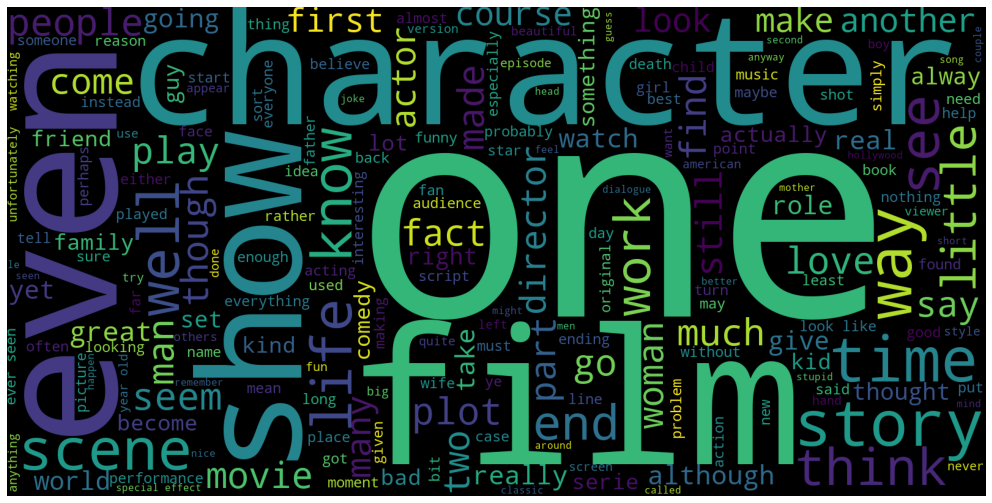

In [11]:
# Display word cloud
unique_str=(" ").join(clean_reviews)
wordcloud = WordCloud(width=1600,height=800).generate(unique_str)
plt.figure(figsize=(18,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(np.stack(clean_reviews), df['sentiment'], test_size=0.2)

In [13]:
# Use TF-IDF to vectorize
tfidf_vec = TfidfVectorizer(ngram_range=(1, 2))
tfidf_train = tfidf_vec.fit_transform(x_train)
tfidf_test = tfidf_vec.transform(x_test)

In [14]:
# Linear support vector classification
linear_svc = LinearSVC()
linear_svc.fit(tfidf_train, y_train)
y_pred = linear_svc.predict(tfidf_test)

In [15]:
# Evaluation metrics
print(classification_report(y_test, y_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.93      0.90      0.91      4954
    Positive       0.90      0.93      0.92      5046

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



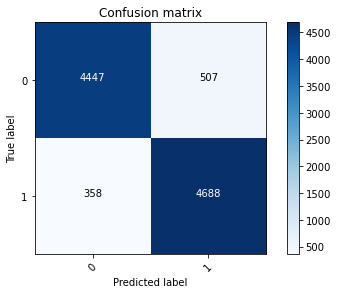

In [16]:
# Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1],
                      title='Confusion matrix')

In [17]:
# Final accuracy
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9135
